# Fitting the conductance to Mott law and rare-chain hopping

In this notebook, we evaluate the agreement between the current-temperature relation exhibited by our parametrisation of the toy model and Mott's law and rare-chain hopping.

## **Step 0:** Import packages and load data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from os import path
from tensor_linregress import tensor_linregress
from param_parser import ParameterParser
import plt_utils

rcParams['image.aspect'] = 'auto'

kB = 8.617e-5

npydir = 'MAC_aligned_focused_ohmic_dmu0.005'
param_file = 'aligned_focused_max_dmu0.02_fine_grids.json'

pp = ParameterParser(param_file)

kappa_grid, w0_grid, temp_grid, e_grid = \
pp.load_grids(plist=['kappa_grid', 'frequency_grid',\
    'temperature_grid', 'energy_grid'])

e_d, e_a, gamL, gamR, gam_phonon = pp.load_intrinsic()

dmu = pp.load_specific(['ohmic_dmu'])[0]

beta_grid = 1.0/(kB*temp_grid)

I = np.load(path.join(npydir,'MAC_current_dis_dmu0.005_aligned.npy'))
# Order of indices in I is (w0, kappa, T)

G = I/dmu # conductance (assume ohmic regime I ~ dmu)
logG = np.log(G)

rtol = 0.95 #threshold for what we consider a 'good' fit


## **Step 1:** Fit to Mott law in 1 dimension:
$$
G = G_0\,\text{exp}\left\{-\left(\frac{T_0}{T}\right)^{1/(d+1)}\right\} = G_0\,\text{exp}\left\{-\sqrt{\frac{T_0}{T}}\right\}
$$

(21, 11)
(21,)


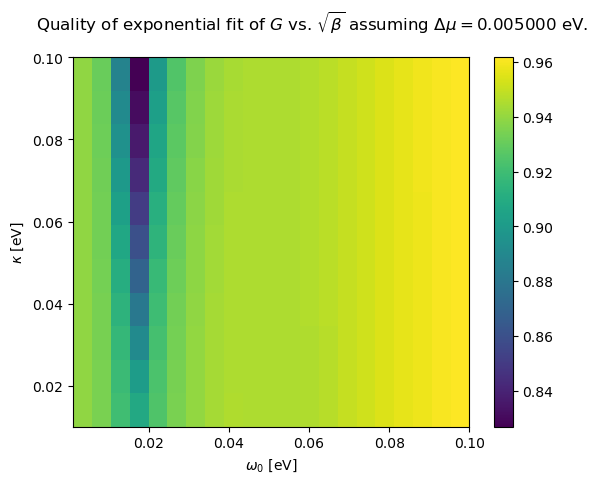

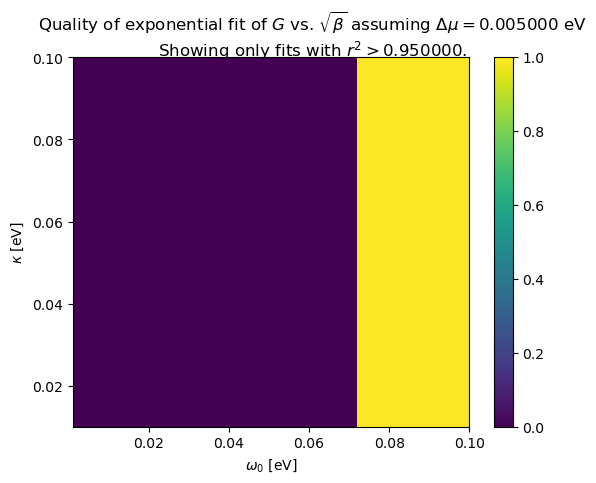

0.04374428290514132


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [14]:
x = np.sqrt(beta_grid)
a1, b1, r1 = tensor_linregress(x,logG)

print(a1.shape)
print(a1[:,-1].shape)

plt.imshow((r1**2).T,origin='lower',extent=[*w0_grid[[0,-1]], *kappa_grid[[0,-1]]])
plt.xlabel('$\omega_0$ [eV]')
plt.ylabel('$\kappa$ [eV]')
plt.suptitle('Quality of exponential fit of $G$ vs. $\sqrt{\\beta}$ assuming $\Delta\mu = %f$ eV.'%(dmu))
plt.colorbar()
plt.show()

plt.imshow(((r1**2) > rtol).T,origin='lower',extent=[*w0_grid[[0,-1]], *kappa_grid[[0,-1]]])
plt.xlabel('$\omega_0$ [eV]')
plt.ylabel('$\kappa$ [eV]')
plt.suptitle('Quality of exponential fit of $G$ vs. $\sqrt{\\beta}$ assuming $\Delta\mu = %f$ eV\nShowing only fits with $r^2 > %f$.'%(dmu,rtol))
plt.colorbar()
plt.show()

print(np.max(np.abs(r1 - r1[:,0][:,None])))

cm = plt_utils.get_cm(w0_grid,'plasma')

for a, c in zip(a1.T,cm):
    plt.plot(w0_grid, a, ls='-',c=c, lw=0.8)
plt.xlabel('$\omega_0$ [eV]')
plt.ylabel('Slope of linear fit')
plt.show()

np.save('fit_params_mott.npy',np.vstack((a1[:,0],b1[:,0],r1[:,0])))